- **INTRODUCTION**

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.

The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

---



 - **CHALLENGES**

Understand the columns of the dataset.

Analyze and visualization of price range according features.

Find the right chart to show the chart.

Difficulties to find out the correct model.



- **Data Description :-**

**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range**- This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

- **Importing essential libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Mobile Price Range - Capstone Project /mobile_price_range.csv')

In [4]:
#Return the first 5 rows of the DataFrame
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.shape

(2000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
# Checking whether there is null values or not
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- There are no missing values in the data set

In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


- Minimum value of px_height and sc_w cannot be zero so & need to deal with that

In [10]:
# Total phones with sc_w = 0
print(len(df[df.sc_w == 0]))
# Total phones with px_height = 0
print(len(df[df.px_height == 0]))

180
2


In [11]:
#where ther is sc_W and px_height is zero ,assigning mean values
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

In [12]:
#checking whether there is duplicates or not
len(df[df.duplicated()])

0

- There are no duplicate values

In [13]:
#The nunique () method returns the number of unique values for each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

#**Exploratory Data Analysis**# 

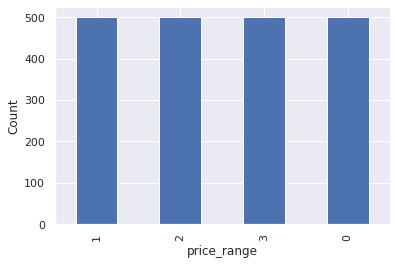

In [14]:
# Price_range

sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

- There are mobile phones in 4 price ranges. The number of elements is almost similar.



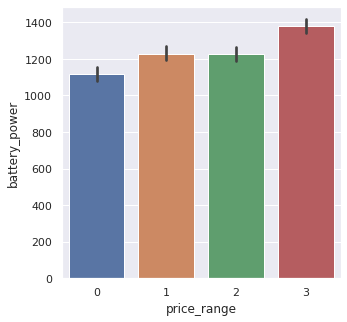

In [15]:
# Battery power

sns.set(rc={'figure.figsize':(5,5)})
ax=sns.barplot(x = 'price_range',y ='battery_power', data = df)
plt.show()

- This plot shows how the battery mAh is spread. there is a gradual increase as the price range increases



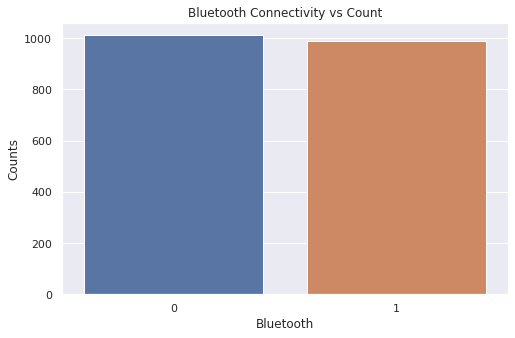

In [17]:
# bluetooth connectivity

fig,ax=plt.subplots(figsize=(8,5))
x=df['blue']
y=df['blue'].value_counts()
sns.barplot(x,y,ax=ax)
plt.xlabel("Bluetooth")
plt.ylabel("Counts")
plt.title("Bluetooth Connectivity vs Count")
plt.show()

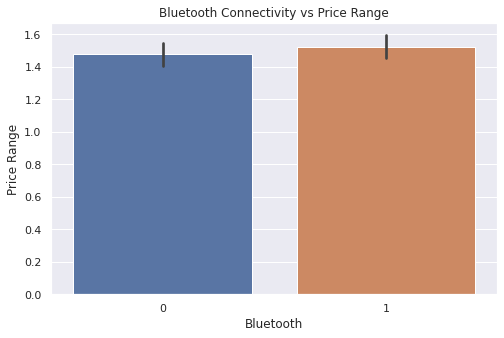

In [ ]:
# bluetooth connectivity

fig,ax=plt.subplots(figsize=(8,5))
x=df['blue']
y=df['price_range']
sns.barplot(x,y,ax=ax)
plt.xlabel("Bluetooth")
plt.ylabel("Price Range")
plt.title("Bluetooth Connectivity vs Price Range")
plt.show()

- As, we see approximately half of devices have bluetooth connectivity & another half of devices dont have bluetooth connectivity.

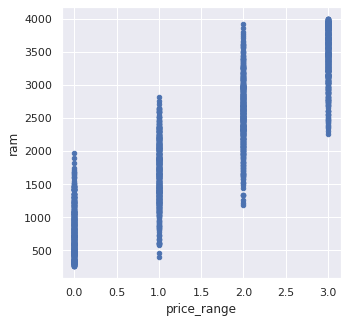

In [ ]:
# RAM

df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

- Ram has continuous increase with price range while moving from Low cost to Very high cost

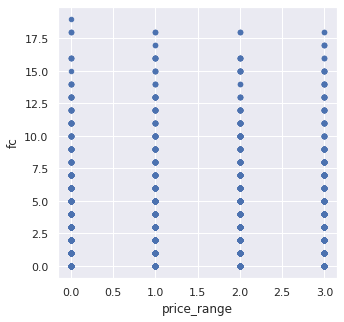

In [ ]:
# FC (front camera megapixels)

df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

- This distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions.



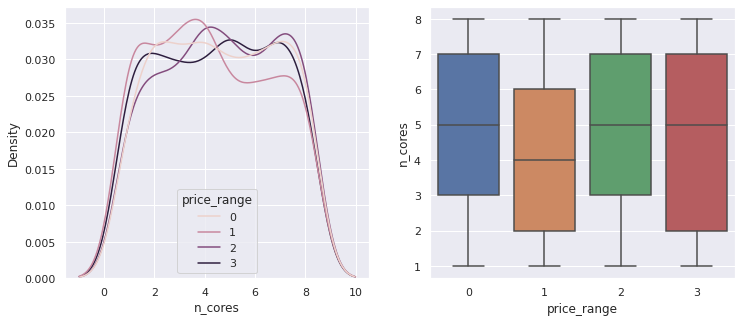

In [ ]:
# PC (Primary camera Megapixels)

fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

- Primary camera megapixels are showing variation along the target categories, which can be used for prediction.

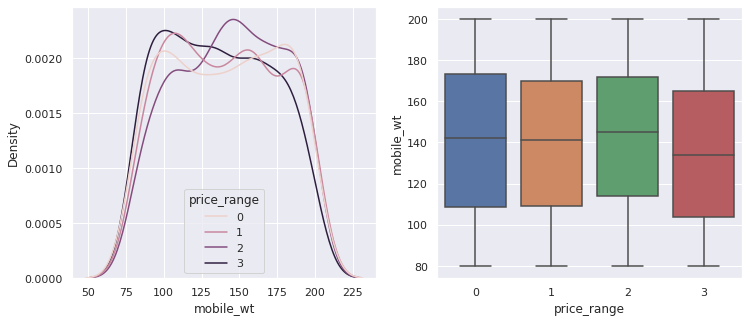

In [ ]:
# Mobile weight

fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

- As we see, costly phones are lighter.

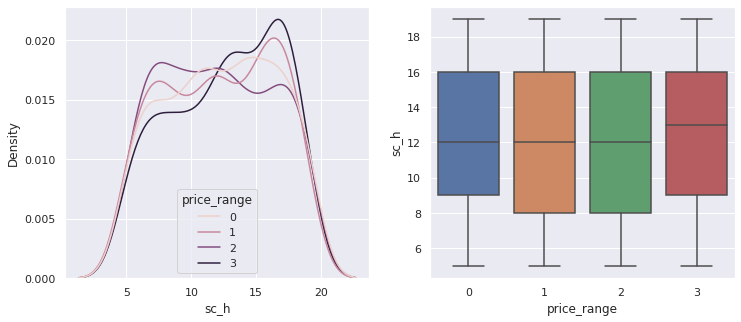

In [ ]:
# screen_size

fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(data=df, x='sc_h', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='sc_h', ax=axs[1])
plt.show()

- Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories.



In [ ]:
connectivity_features = [ 'four_g', 'three_g']

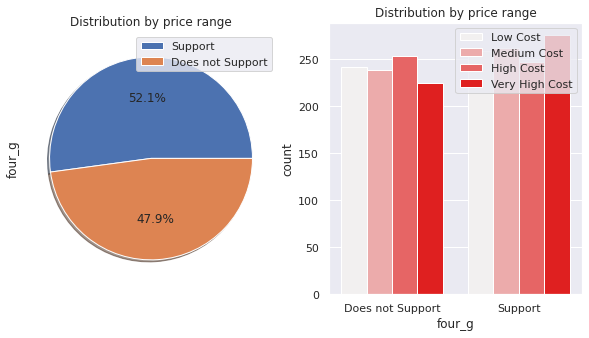

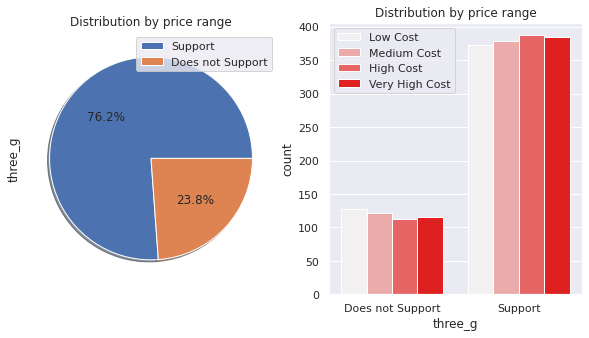

In [ ]:
# Plot of connectivity features against price range

for col in connectivity_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 5))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'red')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

- Connectivity feature 'three_g' play an important feature than 'four_g' in prediction

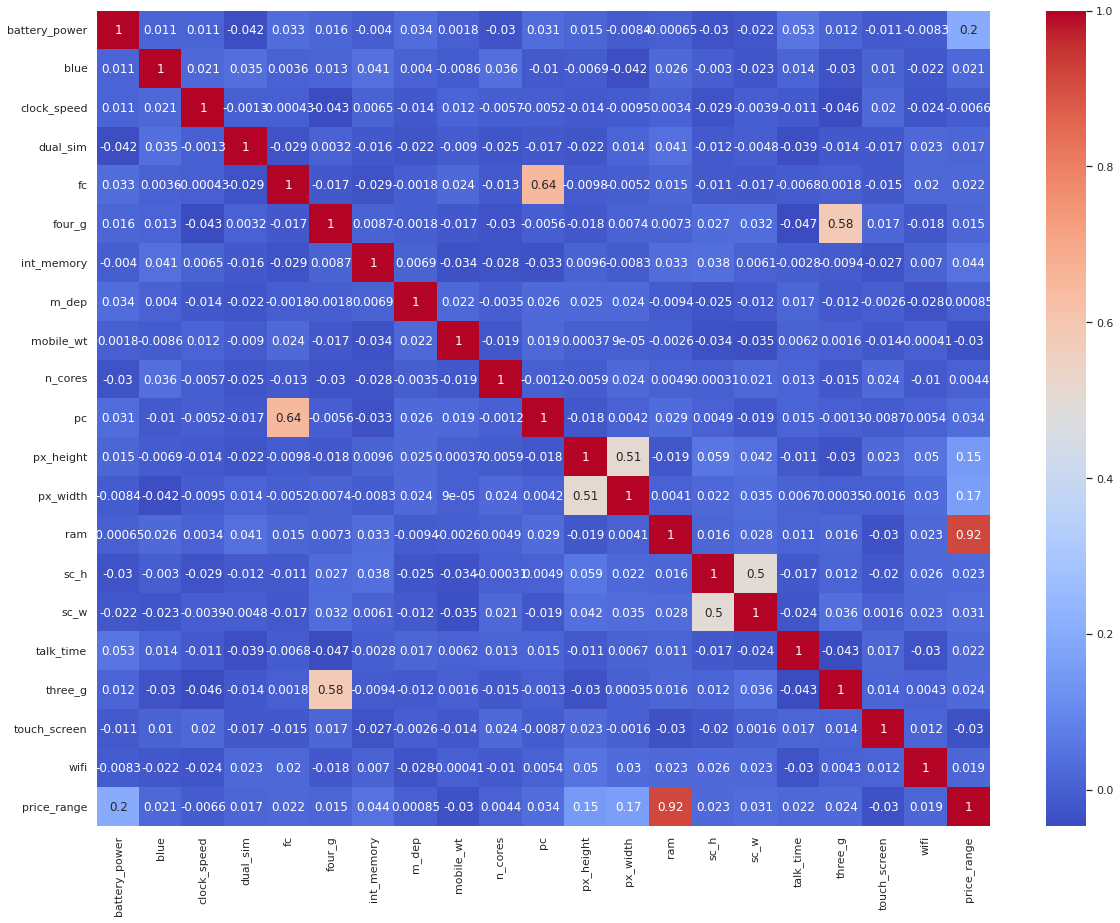

In [ ]:
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)


- RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

- There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.


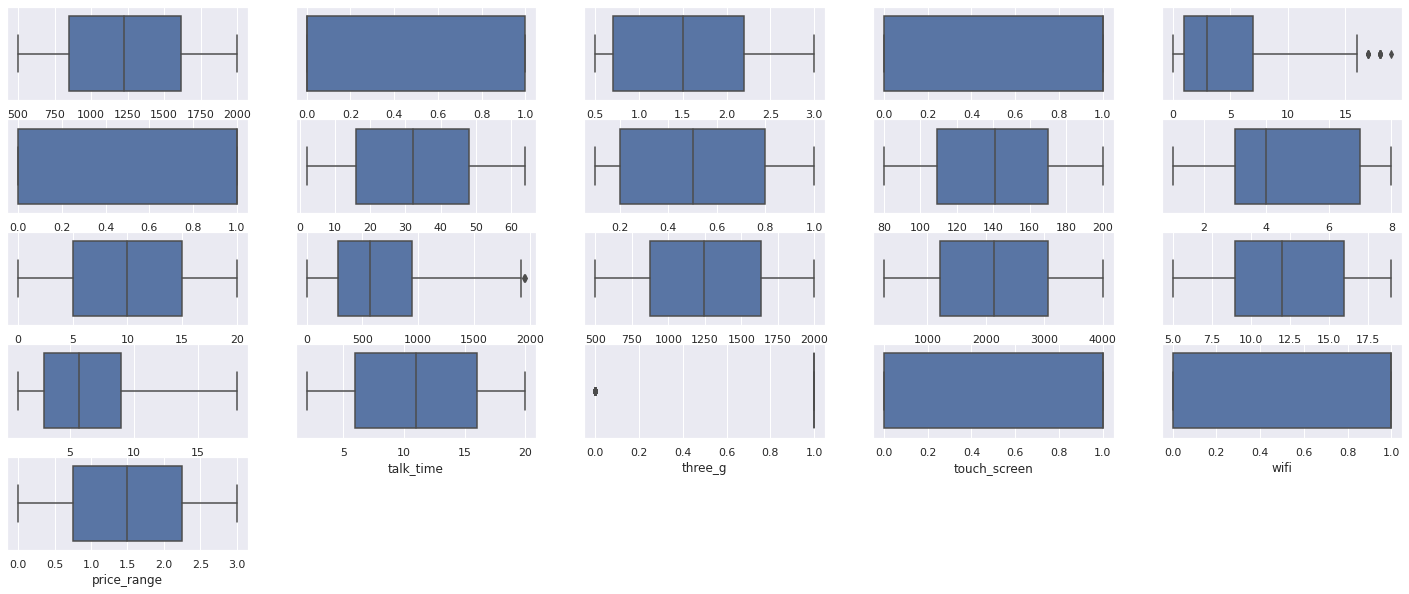

In [ ]:
# looking for outliers using box plot

plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")

- As we see, there are not too much outliers.

- **Implementation of ML Algorithms**

To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set and create target values for test dataset.

- Logistic regression.

- Random Forest

- Decision tree

- Support Vector Machine

In [ ]:
# Defining X and y

x = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [ ]:
print(x.shape,y.shape)

(2000, 20) (2000,)


In [ ]:
# Scaling values of X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(x)

In [ ]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size = 0.20, random_state = 42)

In [ ]:
print(x_train.shape,y_train.shape)

(1600, 20) (1600,)


#Logistic Regression

In [ ]:
# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
log_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print(confusion_matrix(log_pred,y_test))

[[105   1   0   0]
 [  0  86   9   0]
 [  0   4  77   3]
 [  0   0   6 109]]


In [ ]:
print(classification_report(log_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.95      0.91      0.92        95
           2       0.84      0.92      0.88        84
           3       0.97      0.95      0.96       115

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



In [ ]:
print(accuracy_score(y_test,log_pred))

0.9425


- Hyper Parameter Tuning Logistic Regression Model

In [ ]:
lr2 = LogisticRegression(solver='newton-cg')

In [ ]:
lr2.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
log_pred2 = lr2.predict(x_test)

In [ ]:
print(confusion_matrix(log_pred2,y_test))

[[105   1   0   0]
 [  0  86   9   0]
 [  0   4  77   3]
 [  0   0   6 109]]


In [ ]:
print(classification_report(log_pred2, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.95      0.91      0.92        95
           2       0.84      0.92      0.88        84
           3       0.97      0.95      0.96       115

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



In [ ]:
print(accuracy_score(y_test,log_pred2))

0.9425


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier()

In [ ]:
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
ran_pred = classifier.predict(x_test)

In [ ]:
print(accuracy_score(ran_pred,y_test))

0.875


In [ ]:
print(classification_report(ran_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.87      0.84      0.85        94
           2       0.80      0.78      0.79        95
           3       0.86      0.93      0.89       103

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.87       400



- Hyper Parameter Tuning Random Forest Model

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,60,80,100,200,300],
          'max_depth':[10,20,30,40],          
          'max_leaf_nodes':[10, 20, 40]
          }
gsv = GridSearchCV(classifier, param_grid = params, scoring = 'accuracy', cv = 5)



In [ ]:
gsv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_leaf_nodes': [10, 20, 40],
                         'n_estimators': [10, 50, 60, 80, 100, 200, 300]},
             scoring='accuracy')

In [ ]:
print(gsv.best_params_)

{'max_depth': 40, 'max_leaf_nodes': 40, 'n_estimators': 60}


In [ ]:
print(gsv.best_score_)

0.8587499999999999


In [ ]:
ran_pred2 = gsv.predict(x_test)

In [ ]:
print(confusion_matrix(ran_pred2,y_test))

[[101   8   0   0]
 [  4  72   8   0]
 [  0  11  74  10]
 [  0   0  10 102]]


In [ ]:
print(accuracy_score(ran_pred2,y_test))

0.8725


In [ ]:
print(classification_report(ran_pred2, y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       109
           1       0.79      0.86      0.82        84
           2       0.80      0.78      0.79        95
           3       0.91      0.91      0.91       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [ ]:
# Plot the variable importance

feature_importance = pd.DataFrame({'Feature':x.columns,
                                   'Score':classifier.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

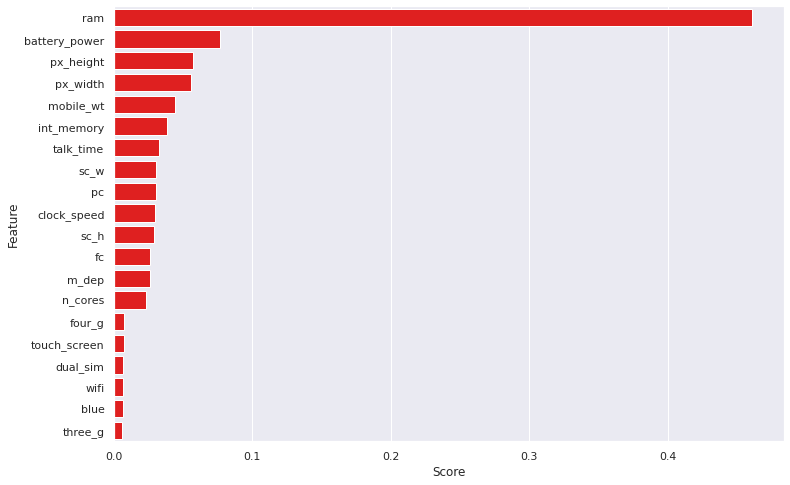

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'], color = 'red')
plt.show()

#Decision tree

In [ ]:
# Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtc_pred = dtc.predict(x_test)

In [ ]:
print(confusion_matrix(dtc_pred,y_test))

[[ 90   6   0   0]
 [ 15  76  14   0]
 [  0   9  65  11]
 [  0   0  13 101]]


In [ ]:
print(classification_report(dtc_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        96
           1       0.84      0.72      0.78       105
           2       0.71      0.76      0.73        85
           3       0.90      0.89      0.89       114

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.82       400
weighted avg       0.83      0.83      0.83       400



In [ ]:
print(accuracy_score(dtc_pred,y_test))

0.83


- Hyper Parameter Tuning Decision Tree Model

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(x_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.800 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.819 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.803 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.772 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.794 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:
dtc_pred2 = grid.predict(x_test)

In [ ]:
print(confusion_matrix(dtc_pred2,y_test))

[[ 91   6   0   0]
 [ 14  77  12   0]
 [  0   8  65  12]
 [  0   0  15 100]]


In [ ]:
print(classification_report(dtc_pred2, y_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        97
           1       0.85      0.75      0.79       103
           2       0.71      0.76      0.73        85
           3       0.89      0.87      0.88       115

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [ ]:
print(accuracy_score(y_test,dtc_pred2))

0.8325


In [ ]:
# Plot the variable importance

feature_importance = pd.DataFrame({'Feature':x.columns,
                                   'Score':dtc.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

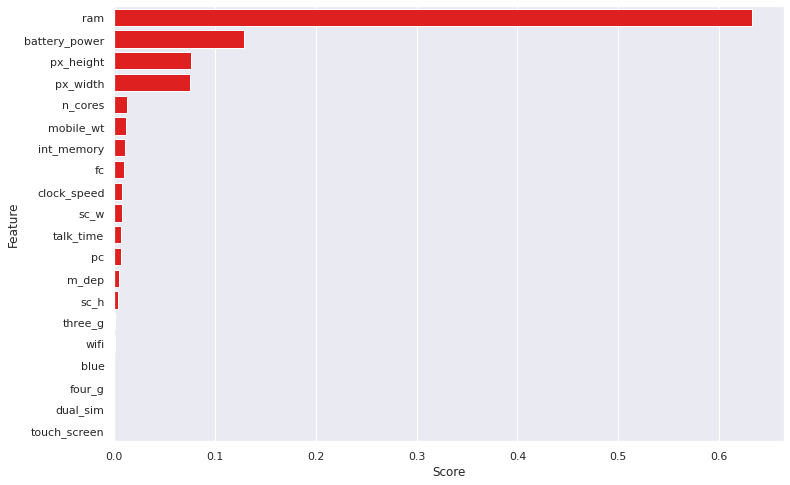

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'], color = 'red')
plt.show()

#Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
svmachine = SVC()

In [ ]:
svmachine.fit(x_train,y_train)

SVC()

In [ ]:
svm_predict = svmachine.predict(x_test)

In [ ]:
print(confusion_matrix(svm_predict,y_test))

[[100   5   0   0]
 [  5  80  13   0]
 [  0   6  72  17]
 [  0   0   7  95]]


In [ ]:
print(classification_report(svm_predict,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.88      0.82      0.85        98
           2       0.78      0.76      0.77        95
           3       0.85      0.93      0.89       102

    accuracy                           0.87       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.87      0.87       400



In [ ]:
print(accuracy_score(svm_predict,y_test))

0.8675


- Hyper parameter Tuning Support Vector Machine Model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'gamma': [.1,.5,.25,1],
             'kernel':['rbf','poly','sigmoid','linear']}
GS = GridSearchCV(SVC(),param_grid,cv=5)

In [ ]:
GS.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': [0.1, 0.5, 0.25, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [ ]:
print (GS.best_score_)
print (GS.best_params_)

0.9306249999999998
{'gamma': 0.1, 'kernel': 'linear'}


In [ ]:
svm_predict_2 = GS.predict(x_test)

In [ ]:
print(confusion_matrix(svm_predict_2,y_test))

[[103   0   0   0]
 [  2  91   5   0]
 [  0   0  83   5]
 [  0   0   4 107]]


In [ ]:
print(classification_report(svm_predict_2,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       103
           1       1.00      0.93      0.96        98
           2       0.90      0.94      0.92        88
           3       0.96      0.96      0.96       111

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
print(accuracy_score(svm_predict_2,y_test))

0.96


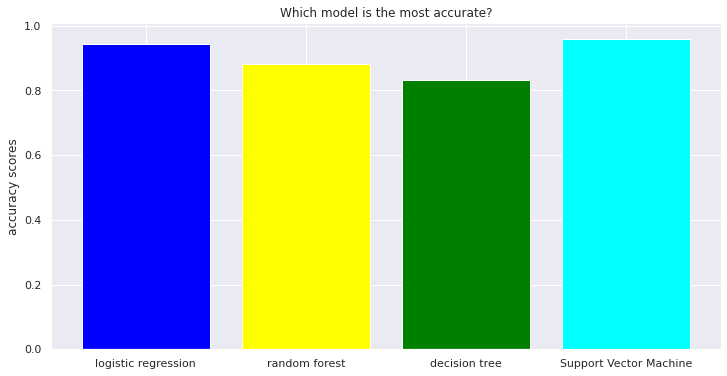

In [ ]:
models = ['logistic regression', 'random forest', 'decision tree','Support Vector Machine']
acc_scores = [0.9425, 0.8825, 0.8325, 0.96]

plt.figure(figsize=(12,6))
plt.bar(models, acc_scores, color=['blue', 'yellow', 'green', 'cyan','red','violet'],)
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

- After training our dataset with four different model, we conclude that Logistic Regression & SVM are the best model for our dataset.

- **Accuracy Scores:-**

Logistic Regression:- 0.9425

Logistic Regression with hyperparameter:- 0.9425

Random Forest:- 0.88

Random Forest with hyperparameter:- 0.8825

Decision Tree:- 0.83

Decision Tree with hyperparameter:- 0.8325

SVM:- 0.8675

SVMt with hyperparameter:- 0.96


- **SUMMARY: Mobile Price Range**

The Mobile Price Range analysis is done by group of 3 members-M.Sameer Ahamed, Ayush Goyal, Nitesh Bhowmick. In this project we got Mobile Price Range as a CSV file.

As we downloaded the data as CSV file from Almabetter Capstone project dasboard we encoded the file in colab notebook trough mounting the drive. All members from the group participated throughout the project with great efforts.

The data was cleared and there are not any NaN & Null values also there are no duplicate values. Each and every column were compared to gain the knowledge for analysis. Worked individually gaining some insights doing some EDA.The first difficulty we faced was the to find the outlier in the dataset, so we checked each & every column & find out that there are not too much outlier in the dataset. By getting info of dataframe we plotted graphs for each data to understand and visualize thouroughly. From graphs we cleared the price range, Battery power, bluetooth connectivity, RAM,FC (front camera megapixels), PC (Primary camera Megapixels), Mobile weight, screen_size confirmed through the data presents.


- **Conclusion**
1. From EDA we can see that there are mobile phones in 4 price ranges. The number of elements is almost similar.
2. Half of devices have bluetooth connectivity & another half of devices dont have bluetooth connectivity.
3. There is a gradual increase in battery as the price range increases
4. Ram has continuous increase with price range while moving from Low cost to Very high cost
5. costly phones are lighter
6. RAM, battery power, pixels played and Connectivity feature 'three_g' &'four_g' more significant role in deciding the price range of mobile phone.
7. From all the above experiments we can conclude that logistic regression and SVM with using hyperparameters we got the best results.

